## STD project

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

import numpy as np
import random as rnd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

google_colab = True

## Train and model utils

In [2]:
from utils.train import *

In [3]:
from utils.models import *

## Train teacher

In [ ]:
import numpy as np

rate_errors = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

batch_size, lr, num_epochs = 50, 0.05, 3

train_loss_all = []
train_acc_all = []
val_loss_all = []
val_acc_all = []
test_loss_all = []
test_acc_all = []

for error_rate in rate_errors:
    train_iter, val_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224, error_rate=error_rate)
    
    teacher_model = FashionMnistResNet(name=f"FashionMnistResNet_error_rate_{error_rate}")
    train_loss, train_acc, val_loss, val_acc, test_acc, test_loss = train(teacher_model, train_iter, val_iter, test_iter, num_epochs, lr, try_gpu()) #2 min
    del teacher_model
    train_loss_all.append(train_loss)
    train_acc_all.append(train_acc)
    val_loss_all.append(val_loss)
    val_acc_all.append(val_acc)
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)


buffer_train_val = np.array([train_loss_all, train_acc_all, val_loss_all, val_acc_all])
buffer_test = np.array([test_loss_all, test_acc_all])

buffer_train_val.tofile("buffer_train_val.numpy")
buffer_test.tofile("buffer_test.numpy")


## Mess the data

In [ ]:
rate_errors = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

## Test distilation

In [ ]:
teacher_model.eval()
student_model = LeNet(distilation=True)
criterion = nn.CrossEntropyLoss()
distilation_loss = DistilationLoss(criterion, teacher_model, distillation_type='hard')
train_iter, val_iter, test_iter = load_data_fashion_mnist(batch_size, error_rate=0.5)
train_loss, train_acc, val_loss, val_acc, test_acc, test_loss = train(student_model, train_iter, val_iter, test_iter, num_epochs, lr, try_gpu(), loss=distilation_loss) #2 min

## Train

In [ ]:
import numpy as np

batch_size, lr, num_epochs = 256, 0.9, 10

train_loss_all = []
train_acc_all = []
val_loss_all = []
val_acc_all = []
test_loss_all = []
test_acc_all = []

for error_rate in rate_errors:
    train_iter, val_iter, test_iter = load_data_fashion_mnist(batch_size, error_rate=error_rate)
    
    net = LeNet(name=f"LeNet_error_rate_{error_rate}")
    train_loss, train_acc, val_loss, val_acc, test_acc, test_loss = train(net, train_iter, val_iter, test_iter, num_epochs, lr, try_gpu()) #2 min
    del net
    train_loss_all.append(train_loss)
    train_acc_all.append(train_acc)
    val_loss_all.append(val_loss)
    val_acc_all.append(val_acc)
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)


buffer_train_val = np.array([train_loss_all, train_acc_all, val_loss_all, val_acc_all])
buffer_test = np.array([test_loss_all, test_acc_all])

buffer_train_val.tofile("buffer_train_val.numpy")
buffer_test.tofile("buffer_test.numpy")

## Data interpretation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

batch_size, lr, num_epochs = 256, 0.9, 10
rate_errors = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

### LeNet

In [2]:
buffer_test = np.fromfile("fashionMnist_iteration2/buffer_test.numpy")
buffer_test = buffer_test.reshape((2, len(rate_errors), 1))

test_loss_all = buffer_test[0]
test_acc_all = buffer_test[1]

# plt.plot(rate_errors, test_acc_all)

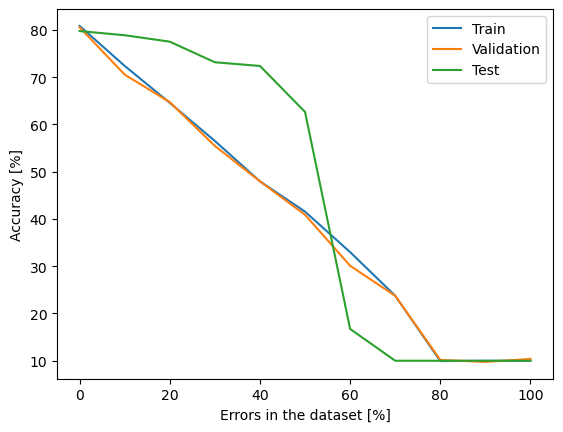

(<matplotlib.legend.Legend at 0x7fa808970100>, None)

In [4]:
buffer_train_val = np.fromfile("fashionMnist_iteration1/buffer_train_val.numpy")
buffer_train_val = buffer_train_val.reshape((4, len(rate_errors), num_epochs))

train_loss_all = buffer_train_val[0]
train_acc_all = buffer_train_val[1]
val_loss_all = buffer_train_val[2]
val_acc_all = buffer_train_val[3]

best_train_acc = train_acc_all[:, -1]
best_val_acc = val_acc_all[:, -1]
error_pergentage = np.multiply(rate_errors, 100)

plt.plot(error_pergentage, best_train_acc, label='Train')
plt.plot(error_pergentage, best_val_acc, label='Validation')
plt.plot(error_pergentage, test_acc_all, label='Test')
plt.xlabel('Errors in the dataset [%]')
plt.ylabel('Accuracy [%]')

plt.legend(), plt.show()

In [9]:
print(test_acc_all)

[[79.77]
 [78.89]
 [77.53]
 [73.17]
 [72.39]
 [62.67]
 [16.73]
 [10.  ]
 [10.  ]
 [10.  ]
 [10.  ]]


### ResNet pretrained on ImageNet

In [5]:
buffer_test = np.fromfile("fashionMnist_ResNet_pretrained_iteration1/buffer_test.numpy")
buffer_test = buffer_test.reshape((2, len(rate_errors), 1))

test_loss_all = buffer_test[0]
test_acc_all = buffer_test[1]

# plt.plot(rate_errors, test_acc_all)

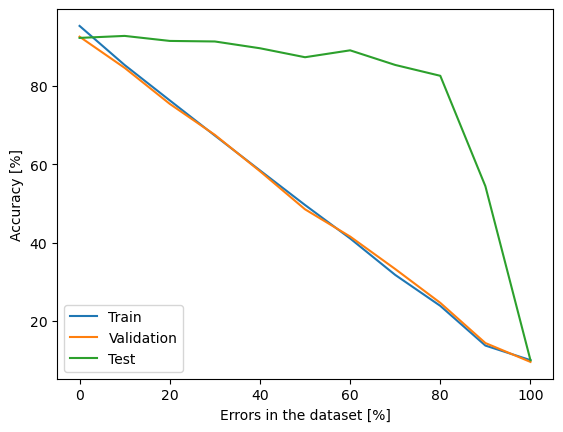

[[92.23]
 [92.74]
 [91.46]
 [91.32]
 [89.59]
 [87.3 ]
 [89.06]
 [85.33]
 [82.56]
 [54.39]
 [ 9.98]]


In [6]:
buffer_train_val = np.fromfile("fashionMnist_ResNet_pretrained_iteration1/buffer_train_val.numpy")
buffer_train_val = buffer_train_val.reshape((4, len(rate_errors), 3))

train_loss_all = buffer_train_val[0]
train_acc_all = buffer_train_val[1]
val_loss_all = buffer_train_val[2]
val_acc_all = buffer_train_val[3]

best_train_acc = train_acc_all[:, -1]
best_val_acc = val_acc_all[:, -1]
error_pergentage = np.multiply(rate_errors, 100)

plt.plot(error_pergentage, best_train_acc, label='Train')
plt.plot(error_pergentage, best_val_acc, label='Validation')
plt.plot(error_pergentage, test_acc_all, label='Test')
plt.xlabel('Errors in the dataset [%]')
plt.ylabel('Accuracy [%]')

plt.legend(), plt.show()

print(test_acc_all)

### ResNet not pretrained

In [7]:
buffer_test = np.fromfile("fashionMnist_ResNet_no_pretrain_iteration1/buffer_test.numpy")
buffer_test = buffer_test.reshape((2, len(rate_errors), 1))

test_loss_all = buffer_test[0]
test_acc_all = buffer_test[1]

# plt.plot(rate_errors, test_acc_all)

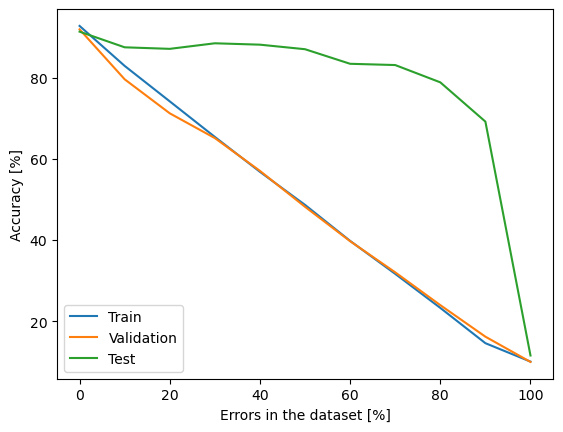

[[91.34]
 [87.48]
 [87.1 ]
 [88.47]
 [88.13]
 [87.01]
 [83.42]
 [83.11]
 [78.85]
 [69.18]
 [11.56]]


In [8]:
buffer_train_val = np.fromfile("fashionMnist_ResNet_no_pretrain_iteration1/buffer_train_val.numpy")
buffer_train_val = buffer_train_val.reshape((4, len(rate_errors), 3))

train_loss_all = buffer_train_val[0]
train_acc_all = buffer_train_val[1]
val_loss_all = buffer_train_val[2]
val_acc_all = buffer_train_val[3]

best_train_acc = train_acc_all[:, -1]
best_val_acc = val_acc_all[:, -1]
error_pergentage = np.multiply(rate_errors, 100)

plt.plot(error_pergentage, best_train_acc, label='Train')
plt.plot(error_pergentage, best_val_acc, label='Validation')
plt.plot(error_pergentage, test_acc_all, label='Test')
plt.xlabel('Errors in the dataset [%]')
plt.ylabel('Accuracy [%]')

plt.legend(), plt.show()

print(test_acc_all)

## Temporary tests

In [ ]:
model = LeNet()

save_model("lenet", model, 1, torch.optim.SGD(model.parameters(), lr=0.9), nn.CrossEntropyLoss())

In [ ]:
cp = load_model("lenet")
model.load_state_dict(cp['model_state_dict'])

In [7]:
model = LeNet()

model.init()

In [4]:
model = LeNet(name=f"LeNet_{1}")

batch_size, lr, num_epochs = 256, 0.9, 4
train_iter, val_iter, test_iter = load_data_fashion_mnist(batch_size)
train_loss, train_acc, val_loss, val_acc, test_acc, test_loss = train(model, train_iter, val_iter, test_iter, num_epochs, lr, try_gpu()) #2 min


Training on cpu
Epoch 1, Train loss 2.32, Train accuracy 10.22, Validation loss 2.30, Validation accuracy 10.32
Saving LeNet_1_best model
Epoch 2, Train loss 1.60, Train accuracy 36.26, Validation loss 1.06, Validation accuracy 57.52
Saving LeNet_1_best model
Epoch 3, Train loss 0.95, Train accuracy 62.26, Validation loss 0.89, Validation accuracy 63.87
Saving LeNet_1_best model
Epoch 4, Train loss 0.80, Train accuracy 68.65, Validation loss 0.76, Validation accuracy 70.76
Saving LeNet_1_best model
Test loss 0.77, Test accuracy 70.66
Saving LeNet_1_last model


In [7]:
model = LeNet(name=f"LeNet_{1}")
cp = load_model(f"{model.name}_last")
model.load_state_dict(cp['model_state_dict'])

batch_size, lr, num_epochs = 256, 0.9, 2
train_iter, val_iter, test_iter = load_data_fashion_mnist(batch_size)
train_loss, train_acc, val_loss, val_acc, test_acc, test_loss = train(model, train_iter, val_iter, test_iter, num_epochs, lr, try_gpu()) #2 min


Loading LeNet_1_last model
Training on cpu
Saving LeNet_1_best model
Epoch 1, Train loss 0.71, Train accuracy 72.42, Validation loss 0.78, Validation accuracy 69.28
Saving LeNet_1_best model
Epoch 2, Train loss 0.64, Train accuracy 75.27, Validation loss 0.63, Validation accuracy 74.55
Test loss 0.64, Test accuracy 74.25
Saving LeNet_1_last model
